# Berita_Online

Berita crawling di situs web mengacu pada pengumpulan berita atau informasi terkini dari situs web berita. Proses ini dapat dilakukan oleh bot yang dikendalikan oleh mesin pencari, agregator berita, atau layanan lainnya yang ingin menyajikan informasi terbaru kepada pengguna mereka.

Langkah-langkah:
1. memulai proses crowling
2. mengidentifikasi URL Artikel
3. Mengakses halaman artikel
4. ekstraksi informasi
5. menyimpan dan mengindeks
6. memperbarui  informasi

In [1]:
!pip install Sastrawi
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import warnings
import pandas as pd
import numpy as np
import nltk
import re
import csv

nltk.download('stopwords')
nltk.download('punkt')
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.2 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
import requests
from bs4 import BeautifulSoup
import nltk

# Unduh konten halaman web berita
url = "https://news.detik.com/pemilu/d-7035258/maju-pilpres-2024-bareng-ganjar-mahfud-minta-doa-ke-gus-mus"
response = requests.get(url)
html = response.text

# Parsing halaman web menggunakan BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# Ekstraksi teks dari elemen-elemen yang berisi berita
article = soup.find('div' ,class_="detail__body-text itp_bodycontent")  # Sesuaikan dengan struktur HTML halaman web berita
article_text = article.get_text()

# Tokenisasi teks menjadi kalimat menggunakan nltk
nltk.download('punkt')  # Pastikan Anda sudah mengunduh tokenisasi kalimat nltk
sentences = nltk.sent_tokenize(article_text)

# Cetak kalimat-kalimat
for sentence in sentences:
    print(sentence)



Jakarta - Cawapres Ganjar Pranowo, Mahfud Md berkunjung ke kediaman Gus Mus, di Kelurahan Leteh, Rembang, Jawa Tengah (Jateng).
Mahfud mengaku memberi informasi bahwa dirinya ikut kontestasi politik kepada Gus Mus.
"Saya kan sering ke sini (Leteh, Rembang), sowan Gus Mus.
Ya saya memberi informasi saja bahwa saya ikut kontestasi politik," kata Mahfud usai sowan dilansir detikJateng, Selasa (14/11/2023).Baca juga: Mahfud Sowan ke Gus Mus: Semua Menjadi Ringan dan SegarMahfud juga sempat memohon doa kepada Gus Mus.
Tetapi doa itu tidak dimaksudkan untuk meminta dukungan, melainkan untuk kebaikan Bangsa Indonesia.
ADVERTISEMENT
















SCROLL TO CONTINUE WITH CONTENT

"Saya minta doa yang terbaik bagi bangsa dan negara Indonesia.
Saya tadi berdoa, ya berdoa bersama-sama, tetapi tidak ada urusan dukung-mendukung atau apa.
Yang didukung adalah kebaikan Indonesia sehingga doanya untuk Indonesia agar lebih baik, itu yang diminta kepada Allah tadi," ungkap Mahfud.Pertemuan dilakukan s

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# Preprocessing
# Lowercasing
article_text = article_text.lower()

# Cleaning
article_text = ''.join(e for e in article_text if (e.isalnum() or e.isspace() or e == '.'))

# Hapus Angka
article_text = ''.join([char for char in article_text if not char.isdigit()])

# Tokenisasi teks menjadi kalimat menggunakan nltk
nltk.download('punkt')
sentences = nltk.sent_tokenize(article_text)

# Tokenisasi setiap kalimat menjadi kata-kata
words = [nltk.word_tokenize(sentence) for sentence in sentences]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
#custome stopword

from nltk.corpus import stopwords

# Mengambil daftar stopword bahasa Indonesia dari NLTK
stopwords_indonesia = set(stopwords.words("indonesian"))

# Sekarang, Anda memiliki daftar stopword yang telah diperbarui
print(stopwords_indonesia)

{'merupakan', 'saya', 'naik', 'berlalu', 'sebabnya', 'dahulu', 'berapalah', 'kepada', 'sekurang-kurangnya', 'atas', 'terhadapnya', 'suatu', 'bersiap', 'bermacam', 'makin', 'berkenaan', 'didapat', 'mereka', 'belumlah', 'beginilah', 'hingga', 'mula', 'tepat', 'berikutnya', 'saja', 'bagaikan', 'jawabnya', 'sayalah', 'tiap', 'tutur', 'wah', 'anda', 'manalagi', 'menyeluruh', 'oleh', 'kira-kira', 'berapakah', 'berdatangan', 'mampukah', 'kelamaan', 'masalahnya', 'ataupun', 'demikianlah', 'kalau', 'ditanyakan', 'percuma', 'satu', 'semasih', 'dari', 'diibaratkan', 'tanyanya', 'kemudian', 'antar', 'kapankah', 'ingin', 'daripada', 'ada', 'dapat', 'ikut', 'melihatnya', 'karena', 'dimulai', 'sendiri', 'berakhirnya', 'secukupnya', 'semaunya', 'terlihat', 'ingat-ingat', 'sesudahnya', 'tetap', 'keseluruhannya', 'ditandaskan', 'semata-mata', 'maka', 'pihaknya', 'dimaksudkan', 'pada', 'selaku', 'ujar', 'sebaliknya', 'jumlahnya', 'seingat', 'mengingat', 'melalui', 'bermaksud', 'diinginkan', 'kira', 'mema

In [5]:
# Stopword Removal
stop_words = set(stopwords.words('indonesian'))
filtered_sentences = []


for sentence in words:
    filtered_sentence = [word for word in sentence if word.lower() not in stop_words]
    filtered_sentences.append(filtered_sentence)


# Cetak kalimat-kalimat yang telah diproses
for filtered_sentence in filtered_sentences:
    print(filtered_sentence)

# Tutup respons setelah digunakan
response.close()

['jakarta', 'cawapres', 'ganjar', 'pranowo', 'mahfud', 'md', 'berkunjung', 'kediaman', 'gus', 'mus', 'kelurahan', 'leteh', 'rembang', 'jawa', 'jateng', '.']
['mahfud', 'mengaku', 'informasi', 'kontestasi', 'politik', 'gus', 'mus.saya', 'leteh', 'rembang', 'sowan', 'gus', 'mus', '.']
['ya', 'informasi', 'kontestasi', 'politik', 'mahfud', 'sowan', 'dilansir', 'detikjateng', 'selasa', '.baca', 'mahfud', 'sowan', 'gus', 'mus', 'ringan', 'segarmahfud', 'memohon', 'doa', 'gus', 'mus', '.']
['doa', 'dukungan', 'kebaikan', 'bangsa', 'indonesia', '.']
['advertisement', 'scroll', 'to', 'continue', 'with', 'content', 'doa', 'terbaik', 'bangsa', 'negara', 'indonesia', '.']
['berdoa', 'ya', 'berdoa', 'bersamasama', 'urusan', 'dukungmendukung', '.']
['didukung', 'kebaikan', 'indonesia', 'doanya', 'indonesia', 'allah', 'mahfud.pertemuan', 'tertutup', 'terpantau', 'jam', '.']
['mahfud', 'rombongan', '.']
['wib', 'berpamitan', 'pulang', '.']
['wib.dari', 'kediaman', 'gus', 'mus', 'terdengar', 'berbinca

In [6]:
pip install tabulate

In [7]:
from tabulate import tabulate
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming filtered_sentences is a list of sentences after stopword removal

# Join the filtered sentences into a list of strings
corpus = [' '.join(sentence) for sentence in filtered_sentences]

# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the corpus to get the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(corpus)

# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a Pandas DataFrame for better visualization
df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=feature_names)

# Add a column for the sentences
df.insert(0, 'Kalimat', [' '.join(sentence) for sentence in filtered_sentences])

# Add a column for the sentence numbers
df.insert(0, 'No', range(1, len(filtered_sentences) + 1))

# Add a column for the count of terms in each sentence
df['Term Count'] = df.drop(['Kalimat', 'No'], axis=1).gt(0).sum(axis=1)

# Set the display options for Pandas to show all columns without truncation
pd.set_option("display.max_columns", None)

# Print the DataFrame in a tabular format with borders
table = tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False)
print(table)

╒══════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤═════════════════╤══════════╤══════════╤══════════╤══════════╤══════════════╤══════════╤══════════╤══════════════╤══════════════╤═══════════════╤══════════╤════════════╤══════════╤═══════════╤════════════╤══════════╤══════════╤═══════════════╤════════════╤════════════╤══════════╤══════════╤════════════╤═══════════════════╤═════════════╤══════════╤══════════╤═════════════╤═════════════╤═══════════╤══════════╤══════════╤═════════╤══════════╤════════════╤════════════╤═════════════╤══════════════╤══════════╤══════════╤══════════╤══════════╤══════════╤═══════════╤═══════════╤══════════╤══════════╤══════════╤══════════╤════════════╤══════════╤═════════════╤═══════════╤═══════════╤═══════════╤══════════╤══════════╤══════════╤═══════════╤══════════╤═════════════╤══════════╤══════════╤══════════╤═══════════════╤══════════╤═══════════════

Cosine Similarity

In [8]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Indeks kalimat yang akan dibandingkan
sentence1_index = 0  # Ganti dengan indeks kalimat pertama yang ingin Anda bandingkan
sentence2_index = 1  # Ganti dengan indeks kalimat kedua yang ingin Anda bandingkan

# Ambil vektor TF-IDF untuk kedua kalimat
tfidf_vector1 = tfidf_matrix[sentence1_index]
tfidf_vector2 = tfidf_matrix[sentence2_index]

# Hitung cosine similarity antara kedua vektor
similarity = cosine_similarity(tfidf_vector1, tfidf_vector2)

# Cetak hasil cosine similarity
print(f"Cosine Similarity antara Kalimat {sentence1_index + 1} dan Kalimat {sentence2_index + 1}: {similarity[0][0]:.4f}")

Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.2968


In [9]:
# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)

# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Cetak hasil similarity_matrix
num_sentences = len(sentences)  # Jumlah kalimat
for i in range(num_sentences):
    for j in range(i+1, num_sentences):
        similarity = similarity_matrix[i][j]
        print(f"Cosine Similarity antara Kalimat {i + 1} dan Kalimat {j + 1}: {similarity:.4f}")

Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.2968
Cosine Similarity antara Kalimat 1 dan Kalimat 3: 0.1364
Cosine Similarity antara Kalimat 1 dan Kalimat 4: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 5: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 6: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 7: 0.0291
Cosine Similarity antara Kalimat 1 dan Kalimat 8: 0.0817
Cosine Similarity antara Kalimat 1 dan Kalimat 9: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 10: 0.1499
Cosine Similarity antara Kalimat 1 dan Kalimat 11: 0.1289
Cosine Similarity antara Kalimat 1 dan Kalimat 12: 0.1713
Cosine Similarity antara Kalimat 2 dan Kalimat 3: 0.5460
Cosine Similarity antara Kalimat 2 dan Kalimat 4: 0.0000
Cosine Similarity antara Kalimat 2 dan Kalimat 5: 0.0000
Cosine Similarity antara Kalimat 2 dan Kalimat 6: 0.0000
Cosine Similarity antara Kalimat 2 dan Kalimat 7: 0.0324
Cosine Similarity antara Kalimat 2 dan Kalimat 8: 0.0909
Cosine Similarity antara Kal

In [20]:
import pandas as pd

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Cetak DataFrame
df

,Kalimat 1,Kalimat 2,Kalimat 3,Kalimat 4,Kalimat 5,Kalimat 6,Kalimat 7,Kalimat 8,Kalimat 9,Kalimat 10,Kalimat 11,Kalimat 12
Kalimat 1,1.000000,0.296799,0.136403,0.000000,0.000000,0.000000,0.029149,0.081718,0.000000,0.149915,0.128944,0.171343
Kalimat 2,0.296799,1.000000,0.546042,0.000000,0.000000,0.000000,0.032409,0.090858,0.000000,0.174960,0.150486,0.132280
Kalimat 3,0.136403,0.546042,1.000000,0.073243,0.044353,0.064257,0.047866,0.134192,0.000000,0.129203,0.175600,0.130247
Kalimat 4,0.000000,0.000000,0.073243,1.000000,0.315393,0.000000,0.308171,0.000000,0.000000,0.000000,0.000000,0.000000
Kalimat 5,0.000000,0.000000,0.044353,0.315393,1.000000,0.000000,0.113737,0.000000,0.000000,0.000000,0.000000,0.000000
Kalimat 6,0.000000,0.000000,0.064257,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Kalimat 7,0.029149,0.032409,0.047866,0.308171,0.113737,0.000000,1.000000,0.086029,0.000000,0.000000,0.000000,0.041750
Kalimat 8,0.081718,0.090858,0.134192,0.000000,0.000000,0.000000,0.086029,1.000000,0.000000,0.000000,0.000000,0.117045
Kalimat 9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.186938,0.000000,0.000000
Kalimat 10,0.149915,0.174960,0.129203,0.000000,0.000000,0.000000,0.000000,0.000000,0.186938,1.000000,0.294771,0.056347


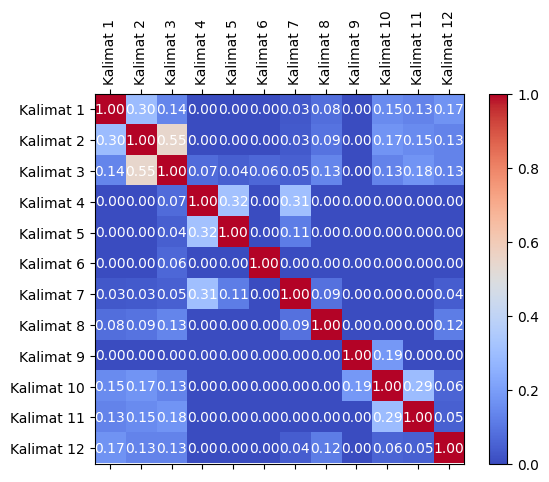

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Membuat grafik matriks
fig, ax = plt.subplots()
cax = ax.matshow(df, cmap='coolwarm')
fig.colorbar(cax)

# Memberi label pada sumbu X dan Y
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.index)))
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticklabels(df.index)

# Menampilkan nilai similarity pada matriks
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        text = ax.text(j, i, f'{df.iat[i, j]:.2f}', ha='center', va='center', color='w')

plt.show()

Closeness Centrality

In [12]:
import networkx as nx

# Buat grafik dari matriks similarity
G = nx.Graph()

# Tambahkan simpul (node) ke grafik yang mewakili setiap kalimat
for sentence in sentences:
    G.add_node(sentence)

# Tambahkan tepi (edge) antara kalimat berdasarkan similarity
for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        similarity = df.iloc[i, j]  # Mengambil similarity dari DataFrame
        if similarity > 0:
            G.add_edge(sentences[i], sentences[j], weight=similarity)

# Hitung closeness centrality untuk setiap simpul
closeness_centrality = nx.closeness_centrality(G, distance='weight')

# Cetak closeness centrality
for sentence, centrality in closeness_centrality.items():
    print(f"Closeness Centrality of {sentence}: {centrality:.4f}")

Closeness Centrality of 
jakarta  cawapres ganjar pranowo mahfud md berkunjung ke kediaman gus mus di kelurahan leteh rembang jawa tengah jateng.: 8.5006
Closeness Centrality of mahfud mengaku memberi informasi bahwa dirinya ikut kontestasi politik kepada gus mus.saya kan sering ke sini leteh rembang sowan gus mus.: 8.2551
Closeness Centrality of ya saya memberi informasi saja bahwa saya ikut kontestasi politik kata mahfud usai sowan dilansir detikjateng selasa .baca juga mahfud sowan ke gus mus semua menjadi ringan dan segarmahfud juga sempat memohon doa kepada gus mus.: 9.2131
Closeness Centrality of tetapi doa itu tidak dimaksudkan untuk meminta dukungan melainkan untuk kebaikan bangsa indonesia.: 5.7102
Closeness Centrality of advertisement
















scroll to continue with content

saya minta doa yang terbaik bagi bangsa dan negara indonesia.: 6.7176
Closeness Centrality of saya tadi berdoa ya berdoa bersamasama tetapi tidak ada urusan dukungmendukung atau apa.: 5.9896
Close

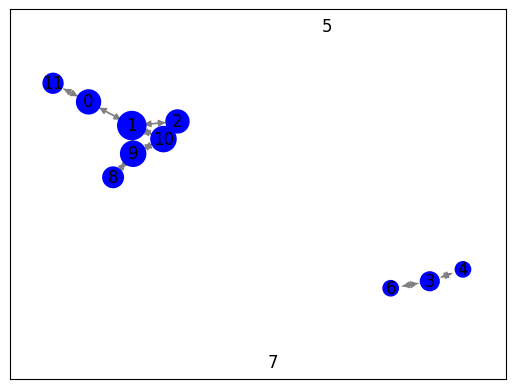

In [13]:
import networkx as nx

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat grafik berarah (DiGraph) berdasarkan similarity_matrix
G = nx.DiGraph()
for i in range(len(similarity_matrix)):
    G.add_node(i)  # Tambahkan node dengan indeks numerik

for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > 0.15 and i != j:  # Pastikan node tidak menghubungkan dirinya sendiri
            G.add_edge(i, j)

# Hitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Visualisasi closeness centrality
pos = nx.spring_layout(G)  # Atur layout grafik
node_size = [v * 1000 for v in closeness_centrality.values()]  # Ubah ukuran node berdasarkan closeness centrality, dengan faktor pengurangan ukuran

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

In [14]:
# Cetak closeness centrality
print("Closeness Centrality:")
# for node, closeness in closeness_centrality.items():
#     print(f"Node {node}: {closeness:.4f}")
sorted_closeness = dict(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))
for node, closeness in sorted_closeness.items():
    print(f"Node {node}: {closeness:.4f}")

Closeness Centrality:
Node 1: 0.4091
Node 9: 0.3273
Node 10: 0.3273
Node 0: 0.2975
Node 2: 0.2727
Node 8: 0.2182
Node 11: 0.2045
Node 3: 0.1818
Node 4: 0.1212
Node 6: 0.1212
Node 5: 0.0000
Node 7: 0.0000


In [15]:
# Cetak closeness centrality
top_3_closeness = list(sorted_closeness.items())[:3]

# Memasukkan 3 kalimat teratas dan informasi node ke dalam DataFrame
datacl = {
    "Node": [node for node, _ in top_3_closeness],
    "Closeness Centrality": [closeness for _, closeness in top_3_closeness],
    "Kalimat": [sentences[node] for node, _ in top_3_closeness]
}

df_top_3 = pd.DataFrame(datacl)

# Cetak DataFrame
print("Tiga Node Closeness Teratas")
df_top_3

Tiga Node Closeness Teratas


,Node,Closeness Centrality,Kalimat
0,1,0.409091,mahfud mengaku memberi informasi bahwa dirinya...
1,9,0.327273,wib.dari luar kediaman gus mus keduanya terden...
2,10,0.327273,sesekali terdengar tawa lepas dari dalam ruang...


In [16]:
# Hitung PageRank
pagerank = nx.pagerank(G)

# Cetak PageRank dalam urutan dari terbesar ke terkecil
print("PageRank :")
sorted_pagerank = dict(sorted(pagerank.items(), key=lambda item: item[1], reverse=True))
for node, rank in sorted_pagerank.items():
    print(f"Node {node}: {rank:.4f}")

PageRank :
Node 1: 0.1578
Node 3: 0.1417
Node 9: 0.1236
Node 10: 0.1177
Node 0: 0.0947
Node 2: 0.0814
Node 4: 0.0748
Node 6: 0.0748
Node 11: 0.0548
Node 8: 0.0496
Node 5: 0.0146
Node 7: 0.0146


In [17]:
# Cetak closeness centrality
top_3_pagerank = list(sorted_pagerank.items())[:3]

# Memasukkan 3 kalimat teratas dan informasi node ke dalam DataFrame
datapg = {
    "Node": [node for node, _ in top_3_pagerank],
    "Pagerank": [rank for _, rank in top_3_pagerank],
    "Kalimat": [sentences[node] for node, _ in top_3_pagerank]
}

df_top_3pg = pd.DataFrame(datapg)

# Cetak DataFrame
print("Tiga Node Pagerank Teratas")
df_top_3pg

Tiga Node Pagerank Teratas


,Node,Pagerank,Kalimat
0,1,0.157789,mahfud mengaku memberi informasi bahwa dirinya...
1,3,0.141692,tetapi doa itu tidak dimaksudkan untuk meminta...
2,9,0.123593,wib.dari luar kediaman gus mus keduanya terden...


In [18]:
import pandas as pd

# Hitung betweenness centrality
betweenness= nx.betweenness_centrality(G)

# Cetak DataFrame
print("DataFrame Betweenness Centrality:")
sorted_betweenness = dict(sorted(betweenness.items(), key=lambda item: item[1], reverse=True))
for node, between in sorted_betweenness.items():
    print(f"Node {node}: {between:.4f}")

DataFrame Betweenness Centrality:
Node 1: 0.1636
Node 0: 0.0909
Node 9: 0.0909
Node 3: 0.0182
Node 10: 0.0182
Node 2: 0.0000
Node 4: 0.0000
Node 5: 0.0000
Node 6: 0.0000
Node 7: 0.0000
Node 8: 0.0000
Node 11: 0.0000


In [19]:
# Cetak closeness centrality
top_3_between = list(sorted_betweenness.items())[:3]

# Memasukkan 3 kalimat teratas dan informasi node ke dalam DataFrame
databw = {
    "Node": [node for node, _ in top_3_between],
    "Between": [between for _, between in top_3_between],
    "Kalimat": [sentences[node] for node, _ in top_3_between]
}

df_top_3bw = pd.DataFrame(databw)

# Cetak DataFrame
print("Tiga Node Between Teratas")
df_top_3bw

Tiga Node Between Teratas


,Node,Between,Kalimat
0,1,0.163636,mahfud mengaku memberi informasi bahwa dirinya...
1,0,0.090909,\njakarta cawapres ganjar pranowo mahfud md b...
2,9,0.090909,wib.dari luar kediaman gus mus keduanya terden...
